In [1]:
!pip install yfinance
!pip install quandl
!pip install ace_tools!pip install ace_tools --upgrade  # Reinstall with upgrade
!pip show ace_tools  # Check if the module is installed and where
!pip install ace_tools  # Correct installation command
!pip install ace_tools --upgrade  # Reinstall with upgrade
!pip show ace_tools  # Check if the module is installed and where
!pip install plotly

ERROR: Invalid requirement: 'ace_tools!pip': Expected end or semicolon (after name and no valid version specifier)
    ace_tools!pip
             ^
Name: ace_tools
Version: 0.0
Summary: A placeholder empty package
Home-page: 
Author: Paul McMillan
Author-email: paul@mcmillan.ws
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [2]:
# For data Analysis
import pandas as pd
import numpy as np
import yfinance as yf

In [3]:
# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Data pre-processinger
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Changed MinMaxScal to MinMaxScaler

In [5]:
# Classifier Libraries
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
# !pip install xgboost
from xgboost import XGBClassifier  # Corrected capitalization
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
# Set Visualization
sns.set()

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [11]:
yf.download

<function yfinance.multi.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', interval='1d', prepost=False, proxy=None, rounding=False, timeout=10, session=None, multi_level_index=True) -> Optional[pandas.core.frame.DataFrame]>

In [12]:
yf.download("AAPL",
            start="2010-01-01", end="2024-01-28", interval="1d")

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.355827,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.344076,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2024-01-22,192.944748,193.889999,195.330002,192.259995,192.300003,60133900
2024-01-23,194.228455,195.179993,195.750000,193.830002,195.020004,42355600


In [13]:
tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")
print(data)

[*********************100%***********************]  2 of 2 completed

Price       Adj Close               Close                High           \
Ticker           NVDA     QUBT       NVDA     QUBT       NVDA     QUBT   
Date                                                                     
2010-03-02   0.386093  134.000   0.421000  134.000   0.430250  134.000   
2010-03-03   0.381278  138.000   0.415750  138.000   0.425750  150.000   
2010-03-04   0.381966  130.000   0.416500  130.000   0.420750  144.000   
2010-03-05   0.393659  160.000   0.429250  160.000   0.432250  160.000   
2010-03-08   0.387927  160.000   0.423000  160.000   0.430750  164.000   
...               ...      ...        ...      ...        ...      ...   
2024-02-21  67.452881    0.785  67.472000    0.785  68.888000    0.860   
2024-02-22  78.515739    0.800  78.538002    0.800  78.574997    0.830   
2024-02-23  78.794647    0.799  78.817001    0.799  82.393997    0.825   
2024-02-26  79.069588    0.869  79.092003    0.869  80.646004    0.890   
2024-02-27  78.678688    0.840  78.700

Feature Engineering:

Computing the stocks the Returns feature

In [14]:
# Assuming 'data' is your DataFrame with stock prices
# Calculate percentage change for each ticker's 'Adj Close' separately
for ticker in tickers:  # tickers = ["NVDA", "QUBT"]
    data[f'{ticker}_Returns'] = data['Adj Close'][ticker].pct_change()

# Drop the first row (NaN due to pct_change())
data = data.dropna()

print(data.head())  # To see the output, run the code.

Price      Adj Close           Close            High             Low         \
Ticker          NVDA   QUBT     NVDA   QUBT     NVDA   QUBT     NVDA   QUBT   
Date                                                                          
2010-03-03  0.381278  138.0  0.41575  138.0  0.42575  150.0  0.41225  132.0   
2010-03-04  0.381966  130.0  0.41650  130.0  0.42075  144.0  0.41125  130.0   
2010-03-05  0.393659  160.0  0.42925  160.0  0.43225  160.0  0.41350  129.0   
2010-03-08  0.387927  160.0  0.42300  160.0  0.43075  164.0  0.42125   14.4   
2010-03-09  0.402371  142.0  0.43875  142.0  0.44300  164.0  0.42700  142.0   

Price          Open            Volume      NVDA_Returns QUBT_Returns  
Ticker         NVDA   QUBT       NVDA QUBT                            
Date                                                                  
2010-03-03  0.42350  132.0  399300000  106    -0.012470     0.029851  
2010-03-04  0.41750  144.0  557396000  180     0.001804    -0.057971  
2010-03-05  

In [15]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# Calculate percentage change for each ticker's 'Adj Close' separately
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].pct_change()

# Drop the first row (NaN due to pct_change()) for each ticker
data = data.dropna()

print(data.head())

[*********************100%***********************]  2 of 2 completed

Empty DataFrame
Columns: [Date, Ticker, Adj Close, Close, High, Low, Open, Volume, NVDA_Returns, QUBT_Returns]
Index: []


In [16]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# Calculate percentage change for each ticker's 'Adj Close' separately
for ticker in tickers:
    # Use groupby to calculate pct_change for each ticker separately
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].groupby(data['Ticker']).pct_change()

# Drop NaN values only within the returns columns, but keep the first row for each ticker
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].fillna(0)  # Fill initial NaN with 0

print(data.head())

[*********************100%***********************]  2 of 2 completed


Price       Date Ticker   Adj Close      Close       High        Low  \
0     2010-03-02   NVDA    0.386093    0.42100    0.43025    0.41800   
1     2010-03-02   QUBT  134.000000  134.00000  134.00000  130.00000   
2     2010-03-03   NVDA    0.381278    0.41575    0.42575    0.41225   
3     2010-03-03   QUBT  138.000000  138.00000  150.00000  132.00000   
4     2010-03-04   NVDA    0.381966    0.41650    0.42075    0.41125   

Price      Open     Volume  NVDA_Returns  QUBT_Returns  
0        0.4250  538648000      0.000000           NaN  
1      130.0000        105           NaN      0.000000  
2        0.4235  399300000     -0.012470           NaN  
3      132.0000        106           NaN      0.029851  
4        0.4175  557396000      0.001804           NaN  


Creating a “tomorrow” column ( next day's adj close price)

In [17]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# Calculate percentage change for each ticker's 'Adj Close' separately
for ticker in tickers:
    # Use groupby to calculate pct_change for each ticker separately
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].groupby(data['Ticker']).pct_change()

# Fill initial NaN with 0 for returns
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].fillna(0)

# Create "tomorrow" column (next day's adjusted closing price)
data['Tomorrow'] = data.groupby('Ticker')['Adj Close'].shift(-1)

print(data.head())

[*********************100%***********************]  2 of 2 completed

Price       Date Ticker   Adj Close      Close       High        Low  \
0     2010-03-02   NVDA    0.386093    0.42100    0.43025    0.41800   
1     2010-03-02   QUBT  134.000000  134.00000  134.00000  130.00000   
2     2010-03-03   NVDA    0.381278    0.41575    0.42575    0.41225   
3     2010-03-03   QUBT  138.000000  138.00000  150.00000  132.00000   
4     2010-03-04   NVDA    0.381966    0.41650    0.42075    0.41125   

Price      Open     Volume  NVDA_Returns  QUBT_Returns    Tomorrow  
0        0.4250  538648000      0.000000           NaN    0.381278  
1      130.0000        105           NaN      0.000000  138.000000  
2        0.4235  399300000     -0.012470           NaN    0.381966  
3      132.0000        106           NaN      0.029851  130.000000  
4        0.4175  557396000      0.001804           NaN    0.393659  


In [18]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# Calculate percentage change for each ticker's 'Adj Close' separately
for ticker in tickers:
    # Use groupby to calculate pct_change for each ticker separately
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].groupby(data['Ticker']).pct_change()

# Fill initial NaN with 0 for returns
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].fillna(0)

# Create "tomorrow" column (next day's adjusted closing price)
data['Tomorrow'] = data.groupby('Ticker')['Adj Close'].shift(-1)

# Create "stocks-Direction" column (1 if tomorrow's price > today's price, 0 otherwise)
data['stocks-Direction'] = (data['Tomorrow'] > data['Adj Close']).astype(int)

print(data.head())

[*********************100%***********************]  2 of 2 completed


Price       Date Ticker   Adj Close      Close       High        Low  \
0     2010-03-02   NVDA    0.386093    0.42100    0.43025    0.41800   
1     2010-03-02   QUBT  134.000000  134.00000  134.00000  130.00000   
2     2010-03-03   NVDA    0.381278    0.41575    0.42575    0.41225   
3     2010-03-03   QUBT  138.000000  138.00000  150.00000  132.00000   
4     2010-03-04   NVDA    0.381966    0.41650    0.42075    0.41125   

Price      Open     Volume  NVDA_Returns  QUBT_Returns    Tomorrow  \
0        0.4250  538648000      0.000000           NaN    0.381278   
1      130.0000        105           NaN      0.000000  138.000000   
2        0.4235  399300000     -0.012470           NaN    0.381966   
3      132.0000        106           NaN      0.029851  130.000000   
4        0.4175  557396000      0.001804           NaN    0.393659   

Price  stocks-Direction  
0                     0  
1                     1  
2                     1  
3                     0  
4               

Exploratory Data and Stock Market Analysis:

1) Investigate historical trends, returns, and volatility.

[*********************100%***********************]  2 of 2 completed


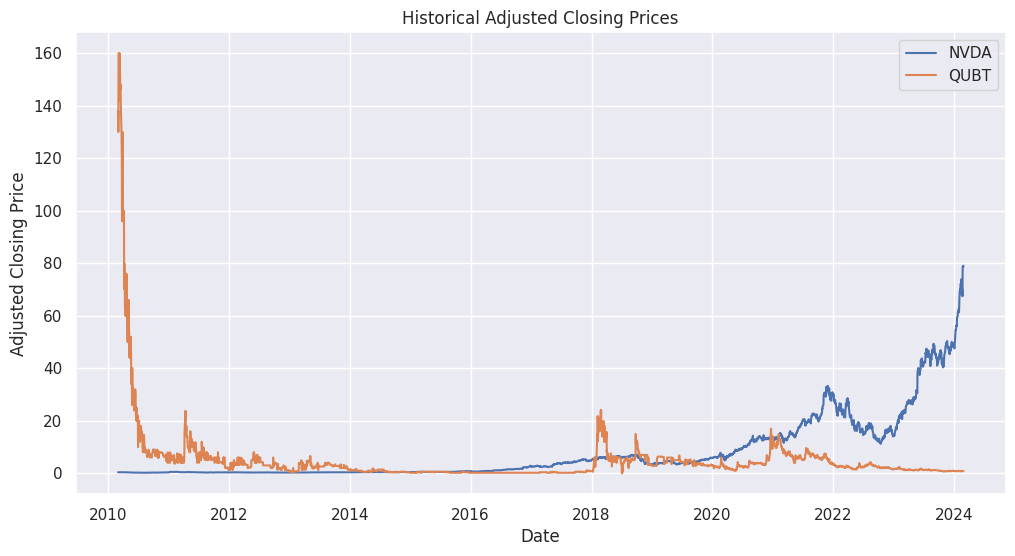

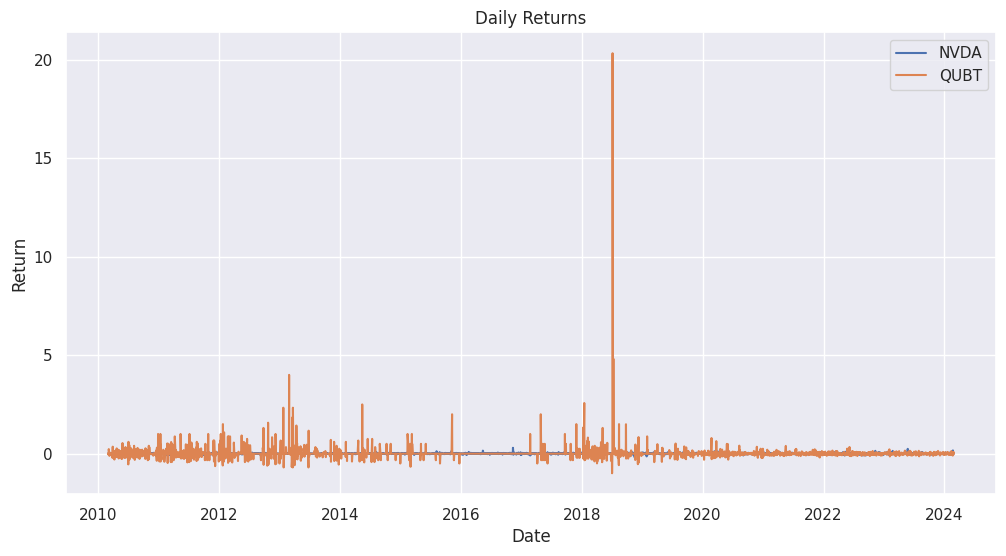

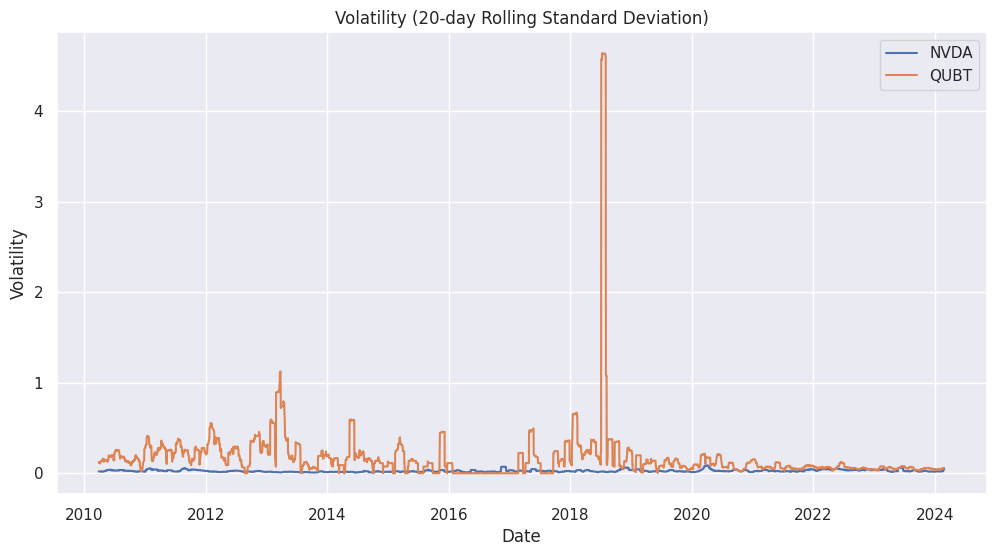

In [19]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# --- Historical Trends ---
# Plot the adjusted closing prices over time
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker]['Adj Close'], label=ticker)
plt.title('Historical Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

# --- Returns ---
# Calculate daily returns
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].groupby(data['Ticker']).pct_change()
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].fillna(0)

# Plot the daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker][f'{ticker}_Returns'], label=ticker)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# --- Volatility ---
# Calculate rolling standard deviation (volatility)
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Volatility'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].rolling(window=20).std()  # 20-day rolling window

# Plot the volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker][f'{ticker}_Volatility'], label=ticker)
plt.title('Volatility (20-day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

[*********************100%***********************]  2 of 2 completed


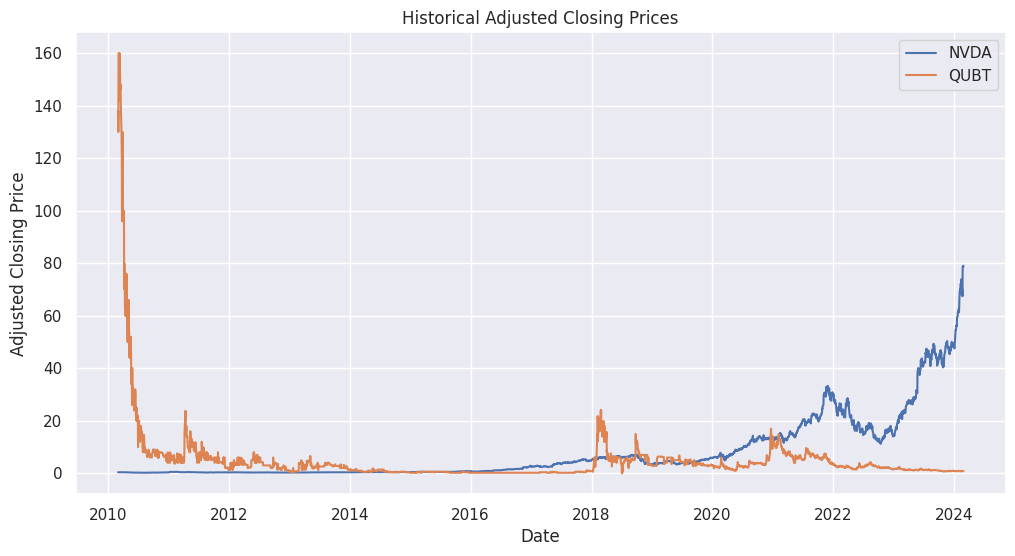

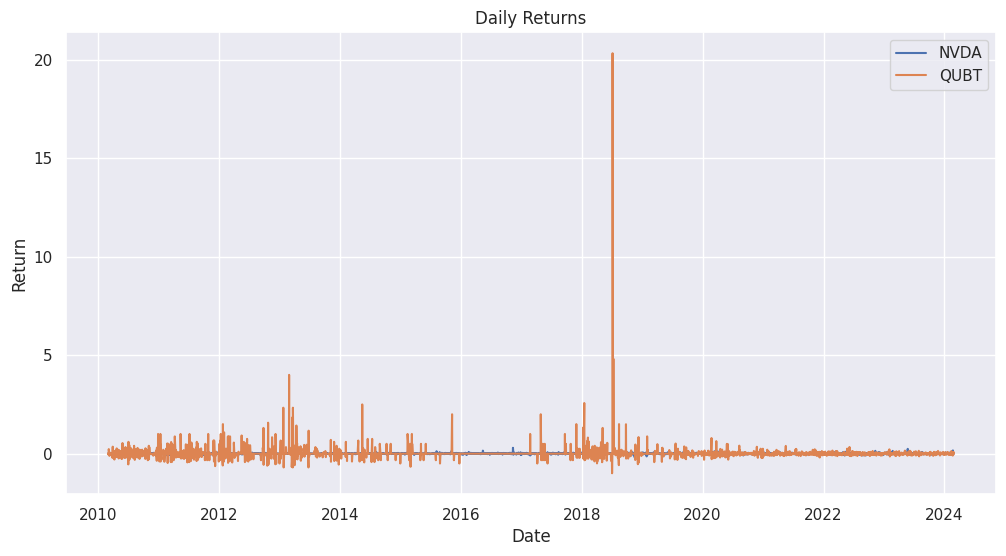

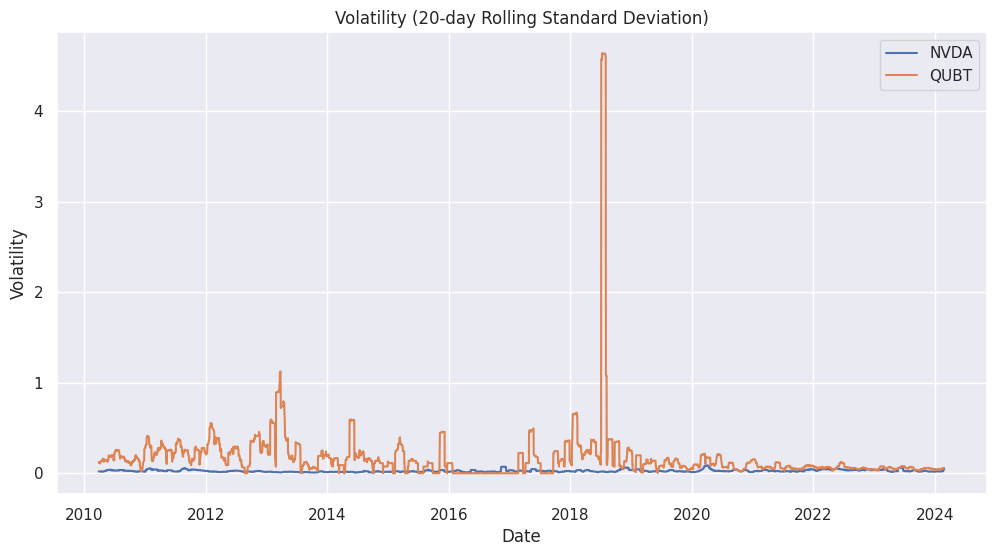

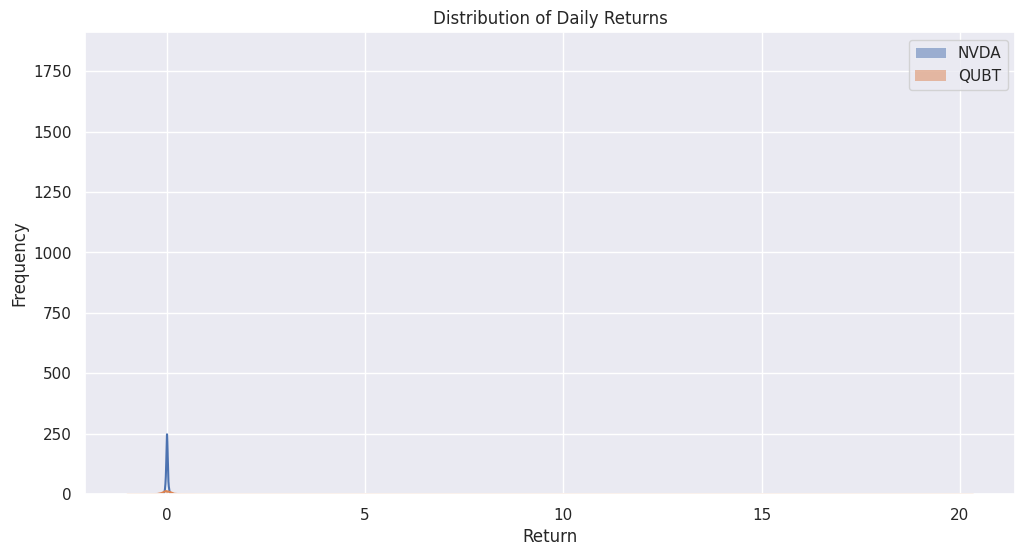

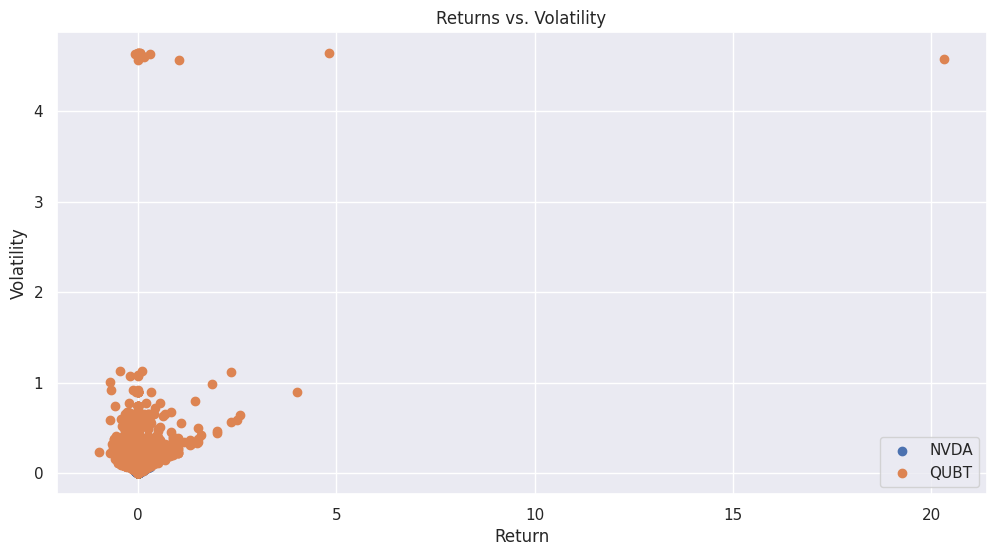

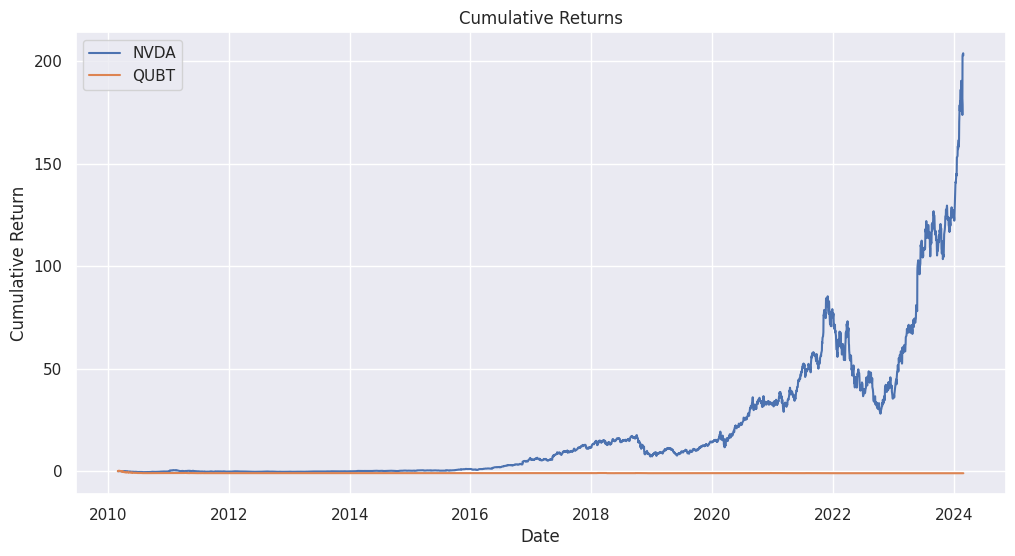

In [20]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# --- Historical Trends ---
# Plot the adjusted closing prices over time
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker]['Adj Close'], label=ticker)
plt.title('Historical Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

# --- Returns ---
# Calculate daily returns
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, 'Adj Close'].groupby(data['Ticker']).pct_change()
    data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].fillna(0)

# Plot the daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker][f'{ticker}_Returns'], label=ticker)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# --- Volatility ---
# Calculate rolling standard deviation (volatility)
for ticker in tickers:
    data.loc[data['Ticker'] == ticker, f'{ticker}_Volatility'] = data.loc[data['Ticker'] == ticker, f'{ticker}_Returns'].rolling(window=20).std()  # 20-day rolling window

# Plot the volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data[data['Ticker'] == ticker]['Date'], data[data['Ticker'] == ticker][f'{ticker}_Volatility'], label=ticker)
plt.title('Volatility (20-day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# --- Additional Graphs ---

# Histogram of daily returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    sns.histplot(data[data['Ticker'] == ticker][f'{ticker}_Returns'], label=ticker, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scatter plot of returns vs. volatility
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.scatter(data[data['Ticker'] == ticker][f'{ticker}_Returns'], data[data['Ticker'] == ticker][f'{ticker}_Volatility'], label=ticker)
plt.title('Returns vs. Volatility')
plt.xlabel('Return')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Cumulative returns
plt.figure(figsize=(12, 6))
for ticker in tickers:
    cumulative_returns = (1 + data[data['Ticker'] == ticker][f'{ticker}_Returns']).cumprod() - 1
    plt.plot(data[data['Ticker'] == ticker]['Date'], cumulative_returns, label=ticker)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

● Create dynamic visualisations to showcase pricing trends, sector impacts, and
financial health.

In [21]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'

# --- Pricing Trends ---
fig1 = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=("Adjusted Closing Price", "Daily Returns"))
for ticker in tickers:
    fig1.add_trace(go.Scatter(x=data[data['Ticker'] == ticker]['Date'], y=data[data['Ticker'] == ticker]['Adj Close'], name=ticker), row=1, col=1)
    fig1.add_trace(go.Scatter(x=data[data['Ticker'] == ticker]['Date'], y=data[data['Ticker'] == ticker]['Adj Close'].pct_change(), name=ticker), row=2, col=1)
fig1.update_layout(title_text="Pricing Trends", height=600)
fig1.show()


[*********************100%***********************]  2 of 2 completed


In [22]:


tickers = ["NVDA", "QUBT"]  # Updated list of ticker symbols
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Restructure the DataFrame to have a single level of columns
data = data.stack(level=1).reset_index()  # Stack the 'Ticker' level and reset index
data.rename(columns={'level_1': 'Ticker'}, inplace=True)  # Rename 'level_1' to 'Ticker'


# --- Candlestick Chart for Pricing Trends ---
fig1 = go.Figure(data=[go.Candlestick(x=data[data['Ticker'] == ticker]['Date'],
                open=data[data['Ticker'] == ticker]['Open'],
                high=data[data['Ticker'] == ticker]['High'],
                low=data[data['Ticker'] == ticker]['Low'],
                close=data[data['Ticker'] == ticker]['Close'],
                name=ticker) for ticker in tickers])
fig1.update_layout(title_text="Pricing Trends (Candlestick Chart)", height=600)
fig1.show()


# --- Area Chart for Cumulative Returns ---
fig2 = go.Figure()
for ticker in tickers:
    cumulative_returns = (1 + data[data['Ticker'] == ticker]['Adj Close'].pct_change()).cumprod() - 1
    fig2.add_trace(go.Scatter(x=data[data['Ticker'] == ticker]['Date'], y=cumulative_returns, fill='tozeroy', name=ticker))  # Fill area to zero
fig2.update_layout(title_text="Cumulative Returns (Area Chart)", height=600)
fig2.show()


# --- Heatmap for Correlation of Daily Returns ---
returns_data = data.pivot(index='Date', columns='Ticker', values='Adj Close').pct_change().dropna()
correlation_matrix = returns_data.corr()

fig3 = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='Viridis'))
fig3.update_layout(title_text="Correlation of Daily Returns (Heatmap)", height=600)
fig3.show()

[*********************100%***********************]  2 of 2 completed


3.Compare each stock performance (the primary and competitor) to the
existing market index

In [23]:


tickers = ["NVDA", "QUBT", "^GSPC"]  # Include the market index (S&P 500)
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Calculate cumulative returns for each ticker
for ticker in tickers:
    data[f'{ticker}_Cumulative_Returns'] = (1 + data['Adj Close'][ticker].pct_change()).cumprod() - 1

# Create a Plotly figure
fig = go.Figure()

# Add traces for each ticker's cumulative returns
for ticker in tickers:
    fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_Cumulative_Returns'], name=ticker))

# Update layout for better visualization
fig.update_layout(title="Cumulative Returns Comparison",
                  xaxis_title="Date",
                  yaxis_title="Cumulative Returns",
                  legend_title="Tickers",
                  height=600)

# Show the plot
fig.show()

[*********************100%***********************]  3 of 3 completed


In [24]:

import plotly.graph_objects as go

tickers = ["NVDA", "QUBT", "^GSPC"]  # Include the market index (S&P 500)
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Calculate normalized performance for each ticker
for ticker in tickers:
    data[f'{ticker}_Normalized'] = (data['Adj Close'][ticker] / data['Adj Close'][ticker].iloc[0]) * 100

# Create a Plotly figure
fig = go.Figure()

# Add traces for each ticker's normalized performance
for ticker in tickers:
    fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_Normalized'], name=ticker))

# Update layout for better visualization
fig.update_layout(title="Normalized Performance Comparison",
                  xaxis_title="Date",
                  yaxis_title="Normalized Performance (Base 100)",
                  legend_title="Tickers",
                  height=600)

# Show the plot
fig.show()

[*********************100%***********************]  3 of 3 completed


Comparative analysis to check which option of the pair is the most suitable for
their client investments, focusing on getting insights on the stock’s volatility

In [25]:


tickers = ["NVDA", "QUBT"]
data = yf.download(tickers, start="2010-03-02", end="2024-02-28", interval="1d")

# Calculate daily returns
for ticker in tickers:
    data[f'{ticker}_Returns'] = data['Adj Close'][ticker].pct_change()

# Calculate rolling standard deviation (volatility)
for ticker in tickers:
    data[f'{ticker}_Volatility'] = data[f'{ticker}_Returns'].rolling(window=20).std()

# --- Volatility Comparison ---
fig = go.Figure()
for ticker in tickers:
    fig.add_trace(go.Scatter(x=data.index, y=data[f'{ticker}_Volatility'], name=ticker))

fig.update_layout(title="Volatility Comparison",
                  xaxis_title="Date",
                  yaxis_title="Volatility (20-day Rolling Standard Deviation)",
                  legend_title="Tickers",
                  height=600)
fig.show()

# --- Statistical Analysis ---
volatility_stats = pd.DataFrame({
    'Stock': tickers,
    'Average Volatility': [data[f'{ticker}_Volatility'].mean() for ticker in tickers],
    'Standard Deviation of Volatility': [data[f'{ticker}_Volatility'].std() for ticker in tickers]
})
print(volatility_stats)

# --- Suitability Analysis ---
# Lower volatility is generally preferred for less risk-tolerant investors
lower_volatility_stock = volatility_stats.loc[volatility_stats['Average Volatility'].idxmin(), 'Stock']
print(f"\nBased on volatility, {lower_volatility_stock} is generally considered less risky.")

# However, higher volatility can also mean higher potential returns
# Consider client's risk tolerance and investment goals before making a recommendation

[*********************100%***********************]  2 of 2 completed


  Stock  Average Volatility  Standard Deviation of Volatility
0  NVDA            0.025655                          0.011961
1  QUBT            0.173729                          0.368283

Based on volatility, NVDA is generally considered less risky.


Modelling & Evaluation:

Use classical ml model Xgboost and LSTM(Deep Learning model) to predict
the stock price movement (stock’s-direction)

In [26]:

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Data Loading and Preprocessing
tickers = ["NVDA", "QUBT"]
start_date = "2010-03-02"
end_date = "2024-02-28"
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

price_column = 'Adj Close' if 'Adj Close' in data.columns else 'Close'

# Feature Engineering (Returns, Tomorrow, Stocks-Direction)
for ticker in tickers:
    data[('Returns', ticker)] = data[price_column][ticker].pct_change()
    data[('Tomorrow', ticker)] = data[price_column][ticker].shift(-1)
    data[('Stocks-Direction', ticker)] = (data[('Tomorrow', ticker)] > data[price_column][ticker]).astype(int)

# Select features and target
features = [('Returns', ticker) for ticker in tickers]
target = ('Stocks-Direction', tickers[0])  # Using NVDA as an example

# Create a DataFrame with features and target
df = data[[target] + features].dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# 2. XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")

# 3. LSTM Model
# Scale the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be [samples, time steps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Model Accuracy: {accuracy_lstm:.2f}")

[*********************100%***********************]  2 of 2 completed


XGBoost Model Accuracy: 0.50
Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5331 - loss: 0.6920
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5260 - loss: 0.6920
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5326 - loss: 0.6912
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5256 - loss: 0.6920
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5364 - loss: 0.6909
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.6902
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 0.6911
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5491 - loss: 0.6890
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.6904
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5394 - loss: 0.6902
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5348 - loss: 0.6908
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━

Validate models using a train-test split (80:20)

In [27]:

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ... (Data Loading and Preprocessing - same as before) ...

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42, shuffle=False  # Added shuffle=False for time series data
)

# ... (XGBoost Model - same as before) ...

# ... (LSTM Model - same as before) ...

Evaluate Model performance

In [28]:

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (Data Loading, Preprocessing, Model Training - same as before) ...

# --- Model Evaluation ---

# XGBoost
print("\n--- XGBoost Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# LSTM
print("\n--- LSTM Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lstm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lstm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lstm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lstm))


--- XGBoost Model Evaluation ---
Accuracy: 0.5064
Precision: 0.5350
Recall: 0.6058
F1-score: 0.5682
Confusion Matrix:
[[128 199]
 [149 229]]

--- LSTM Model Evaluation ---
Accuracy: 0.5333
Precision: 0.5349
Recall: 0.9947
F1-score: 0.6957
Confusion Matrix:
[[  0 327]
 [  2 376]]


Fundamental Analysis:

Analyze revenue, profit, and capital structure trends from financial
statements.

In [37]:
def analyze_financial_trends(ticker):
    """Analyzes revenue, profit, and capital structure trends."""
    stock = yf.Ticker(ticker)

    # Get financial statements
    income_statement = stock.financials
    balance_sheet = stock.balance_sheet

    # Extract relevant data with fallback for missing keys
    # Use .loc[] directly instead of .loc.get() for income_statement and balance_sheet
    revenue = income_statement.loc.get('Total Revenue', pd.Series(dtype=float))
    profit = income_statement.loc.get('Net Income', pd.Series(dtype=float))
    total_assets = balance_sheet.loc.get('Total Assets', pd.Series(dtype=float))
    total_liabilities = balance_sheet.loc.get('Total Liab', balance_sheet.loc.get('Total Liabilities', pd.Series(dtype=float)))
    total_equity = balance_sheet.loc.get('Total Stockholder Equity', pd.Series(dtype=float))

    # Check if any critical data is missing
    if revenue.empty or profit.empty or total_assets.empty or total_liabilities.empty or total_equity.empty:
        print(f"Error: Missing critical financial data for {ticker}. Skipping analysis.")
        return

    # Calculate financial ratios
    profit_margin = profit / revenue
    debt_to_equity = total_liabilities / total_equity

    # Create a DataFrame for analysis
    financial_data = pd.DataFrame({
        'Revenue': revenue,
        'Profit': profit,
        'Profit Margin': profit_margin,
        'Debt/Equity': debt_to_equity,
    })

    # Print analysis
    print(f"\n--- Financial Trends for {ticker} ---")
    print(financial_data)

In [36]:
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd

def analyze_financial_trends(ticker):
    """Analyzes and visualizes revenue, profit, and capital structure trends."""
    stock = yf.Ticker(ticker)

    # Get financial statements
    income_statement = stock.financials
    balance_sheet = stock.balance_sheet

    # Debugging: Print available keys
    print(f"Available keys in income_statement for {ticker}:")
    print(income_statement.index)

    print(f"Available keys in balance_sheet for {ticker}:")
    print(balance_sheet.index)

    # Extract relevant data with fallback for missing keys
    try:
        revenue = income_statement.loc['Total Revenue']
    except KeyError:
        revenue = pd.Series(dtype=float)
        print(f"Warning: 'Total Revenue' not found for {ticker}.")

    try:
        profit = income_statement.loc['Net Income']
    except KeyError:
        profit = pd.Series(dtype=float)
        print(f"Warning: 'Net Income' not found for {ticker}.")

    try:
        total_assets = balance_sheet.loc['Total Assets']
    except KeyError:
        total_assets = pd.Series(dtype=float)
        print(f"Warning: 'Total Assets' not found for {ticker}.")

    try:
        total_liabilities = balance_sheet.loc['Total Liab']
    except KeyError:
        try:
            total_liabilities = balance_sheet.loc['Total Liabilities']
        except KeyError:
            total_liabilities = pd.Series(dtype=float)
            print(f"Warning: 'Total Liab' or 'Total Liabilities' not found for {ticker}.")

    try:
        total_equity = balance_sheet.loc['Total Stockholder Equity']
    except KeyError:
        total_equity = pd.Series(dtype=float)
        print(f"Warning: 'Total Stockholder Equity' not found for {ticker}.")

    # Check if any critical data is missing
    if revenue.empty or profit.empty or total_assets.empty or total_liabilities.empty or total_equity.empty:
        print(f"Error: Missing critical financial data for {ticker}. Skipping analysis.")
        return



Available keys in income_statement for NVDA:
Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges'

In [49]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

def analyze_financial_trends(ticker):
    """
    Analyzes and visualizes revenue, profit, and capital structure trends.

    Parameters:
        ticker (str): Stock ticker symbol.
    """
    # Get financial data from Yahoo Finance
    stock = yf.Ticker(ticker)
    income_statement = stock.financials
    balance_sheet = stock.balance_sheet

    # Extract relevant data
    try:
        revenue = income_statement.loc['Total Revenue']
    except KeyError:
        print(f"Revenue data not available for {ticker}.")
        revenue = pd.Series(dtype=float)

    try:
        profit = income_statement.loc['Net Income']
    except KeyError:
        print(f"Net Income data not available for {ticker}.")
        profit = pd.Series(dtype=float)

    try:
        total_assets = balance_sheet.loc['Total Assets']
    except KeyError:
        print(f"Total Assets data not available for {ticker}.")
        total_assets = pd.Series(dtype=float)

    try:
        total_liabilities = balance_sheet.loc.get('Total Liab', balance_sheet.loc.get('Total Liabilities', pd.Series(dtype=float)))
    except KeyError:
        print(f"Total Liabilities data not available for {ticker}.")
        total_liabilities = pd.Series(dtype=float)

    try:
        total_equity = balance_sheet.loc['Total Stockholder Equity']
    except KeyError:
        print(f"Stockholder Equity data not available for {ticker}.")
        total_equity = pd.Series(dtype=float)

    # Check for missing data
    if revenue.empty or profit.empty or total_assets.empty or total_liabilities.empty or total_equity.empty:
        print(f"Missing critical financial data for {ticker}. Skipping analysis.")
        return

    # Calculate financial ratios
    profit_margin = profit / revenue
    debt_to_equity = total_liabilities / total_equity

    # Create a DataFrame for analysis
    financial_data = pd.DataFrame({
        'Revenue': revenue,
        'Profit': profit,
        'Profit Margin': profit_margin,
        'Debt/Equity': debt_to_equity,
    })

    # Visualize financial trends
    financial_data = financial_data.T
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=financial_data.columns,
        y=financial_data.loc['Revenue'],
        name='Revenue'
    ))

    fig.add_trace(go.Bar(
        x=financial_data.columns,
        y=financial_data.loc['Profit'],
        name='Profit'
    ))

    fig.add_trace(go.Scatter(
        x=financial_data.columns,
        y=financial_data.loc['Profit Margin'],
        mode='lines+markers',
        name='Profit Margin',
        yaxis='y2'
    ))

    fig.add_trace(go.Scatter(
        x=financial_data.columns,
        y=financial_data.loc['Debt/Equity'],
        mode='lines+markers',
        name='Debt/Equity',
        yaxis='y2'
    ))

    fig.update_layout(
        title=f"Financial Trends for {ticker}",
        xaxis_title="Year",
        yaxis=dict(title="Amount (USD)"),
        yaxis2=dict(title="Ratio", overlaying="y", side="right"),
        barmode='group',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    fig.show()

# List of tickers for analysis
tickers = ["NVDA", "TSLA"]

# Analyze financial trends for each ticker
for ticker in tickers:
    analyze_financial_trends(ticker)


AttributeError: '_LocIndexer' object has no attribute 'get'

In [50]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

def analyze_financial_trends(ticker):
    """
    Analyzes and visualizes revenue, profit, and capital structure trends.

    Parameters:
        ticker (str): Stock ticker symbol.
    """
    stock = yf.Ticker(ticker)

    # Get financial data
    income_statement = stock.financials
    balance_sheet = stock.balance_sheet

    # Debugging: Display available keys for financial statements
    print(f"Available keys in income statement for {ticker}:")
    print(income_statement.index)

    print(f"Available keys in balance sheet for {ticker}:")
    print(balance_sheet.index)

    # Extract relevant data with fallback for missing keys
    try:
        revenue = income_statement.loc['Total Revenue']
    except KeyError:
        revenue = pd.Series(dtype=float)
        print(f"Warning: 'Total Revenue' not found for {ticker}.")

    try:
        profit = income_statement.loc['Net Income']
    except KeyError:
        profit = pd.Series(dtype=float)
        print(f"Warning: 'Net Income' not found for {ticker}.")

    try:
        total_assets = balance_sheet.loc['Total Assets']
    except KeyError:
        total_assets = pd.Series(dtype=float)
        print(f"Warning: 'Total Assets' not found for {ticker}.")

    # Handle total liabilities with fallback for different labels
    try:
        total_liabilities = balance_sheet.loc['Total Liab']
    except KeyError:
        try:
            total_liabilities = balance_sheet.loc['Total Liabilities']
        except KeyError:
            total_liabilities = pd.Series(dtype=float)
            print(f"Warning: 'Total Liab' or 'Total Liabilities' not found for {ticker}.")

    try:
        total_equity = balance_sheet.loc['Total Stockholder Equity']
    except KeyError:
        total_equity = pd.Series(dtype=float)
        print(f"Warning: 'Total Stockholder Equity' not found for {ticker}.")

    # Check for missing critical data
    if revenue.empty or profit.empty or total_assets.empty or total_liabilities.empty or total_equity.empty:
        print(f"Error: Missing critical financial data for {ticker}. Skipping analysis.")
        return

    # Calculate financial ratios
    profit_margin = profit / revenue
    debt_to_equity = total_liabilities / total_equity

    # Create a DataFrame for visualization
    financial_data = pd.DataFrame({
        'Revenue': revenue,
        'Profit': profit,
        'Profit Margin': profit_margin,
        'Debt/Equity': debt_to_equity,
    })

    # Visualization
    financial_data = financial_data.T  # Transpose for plotting
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=financial_data.columns,
        y=financial_data.loc['Revenue'],
        name='Revenue'
    ))

    fig.add_trace(go.Bar(
        x=financial_data.columns,
        y=financial_data.loc['Profit'],
        name='Profit'
    ))

    fig.add_trace(go.Scatter(
        x=financial_data.columns,
        y=financial_data.loc['Profit Margin'],
        mode='lines+markers',
        name='Profit Margin',
        yaxis='y2'
    ))

    fig.add_trace(go.Scatter(
        x=financial_data.columns,
        y=financial_data.loc['Debt/Equity'],
        mode='lines+markers',
        name='Debt/Equity',
        yaxis='y2'
    ))

    fig.update_layout(
        title=f"Financial Trends for {ticker}",
        xaxis_title="Year",
        yaxis=dict(title="Amount (USD)"),
        yaxis2=dict(title="Ratio", overlaying="y", side="right"),
        barmode='group',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    fig.show()

# List of tickers for analysis
tickers = ["NVDA", "TSLA"]

# Analyze financial trends for each ticker
for ticker in tickers:
    analyze_financial_trends(ticker)


Available keys in income statement for NVDA:
Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges'